In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:\\Users\\Ashish Pawar\\Desktop\\HeavyWater\\shuffled-full-set-hashed.xlsx')


In [3]:
# removing the entries for which contents do not exist
df=df[pd.notnull(df['content'])]

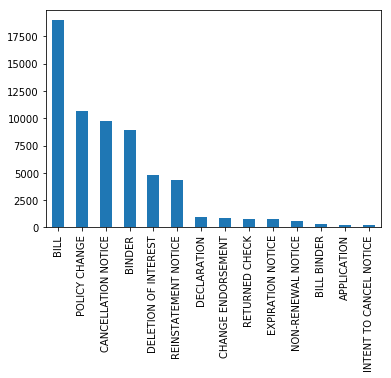

In [4]:
#generating the frequency distribution plot for documents
fig, ax = plt.subplots()
df['Tags'].value_counts().plot(ax=ax, kind='bar')

In [5]:
# assigning a tag id to every documents
df['Tag_id']=df['Tags'].factorize()[0]

In [6]:
tag_id_df = df[['Tags','Tag_id']].drop_duplicates().sort_values('Tag_id')
tag_to_id = dict(tag_id_df.values)
id_to_tag = dict(tag_id_df[['Tag_id','Tags']].values)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.2)
features = tfidf.fit_transform(df.content).toarray()
labels = df.Tag_id


In [13]:
# apply Smote to balance  the imbalanced data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25,random_state=27)
sm = SMOTE('minority',random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

models=[RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),MultinomialNB(),LogisticRegression(random_state=0)]
CV=5
cv_df=pd.DataFrame(index=range(CV*len(models)))
entries=[]
for model in models:
    model_name = model.__class__.__name__
    acc=cross_val_score(model,X_train,y_train,scoring='accuracy',cv=CV)
    for fold , accu in enumerate(acc):
        entries.append((model_name,fold,accu))
cv_df=pd.DataFrame(entries,columns=['model_name','fold','accuracy'])


C:\Users\Ashish Pawar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashish Pawar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Ashish Pawar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashish Pawar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.

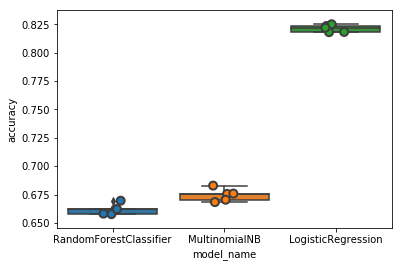

In [20]:
import seaborn as sns
sns.boxplot(x='model_name',y='accuracy',data=cv_df)
sns.stripplot(x='model_name',y='accuracy',data=cv_df,size=8,jitter=True,edgecolor='gray',linewidth=2)

In [23]:
# using logistic regression to predict
from sklearn.metrics import r2_score
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))

C:\Users\Ashish Pawar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashish Pawar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7839124839124839


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1146
           1       0.94      0.76      0.84       193
           2       0.86      0.87      0.86      4861
           3       0.74      0.78      0.76      2599
           4       0.78      0.72      0.75      2455
           5       0.55      0.07      0.13       247
           6       0.87      0.74      0.80       241
           7       0.84      0.55      0.66       164
           8       0.76      0.83      0.79      2197
           9       0.85      0.76      0.80      1076
          10       0.88      0.49      0.63       174
          11       0.08      0.79      0.15        66
          12       1.00      0.11      0.19        57
          13       0.00      0.00      0.00        64

   micro avg       0.78      0.78      0.78     15540
   macro avg       0.72      0.59      0.59     15540
weighted avg       0.81      0.78      0.79     15540



In [25]:
#saving the model
import pickle
filename = 'classifier.sav'
pickle.dump(logreg, open(filename, 'wb'))


In [27]:
print(y_pred)

[3 2 2 ... 2 9 2]
